In [3]:
## 시군구 잘못 들어가있는 상황 체크함.
## 수정은 원래 csv. 파일에 들어가서 '모두 찾아 바꾸기'로 바꿨던 걸로 기억.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

df1 = pd.read_csv('./complex_20230308.csv', header=None)
df1.columns = ['old_addr_idx', 'complex_name', 'property_type','시도','시군구',
               '읍면동','리','road_name','road_code','admin_dong_code','postal_code','jibun_main','jibun_sub','updated']

df2 = pd.read_csv('./property_20230308.csv', header=None)
df2.columns = ['pk','old_addr_idx','dong','ho','official_price','net_leasable_area','updated']

df_tot = df2.merge(df1, on='old_addr_idx')

df_apt_tot = df_tot[df_tot['property_type']=='apartment']

pd.options.display.max_columns = None
df_apt_tot['평수'] = df_apt_tot['net_leasable_area'] / 3.3

ranges = [(0, 10, '10평 미만'), (10, 20, '10평대'), (20, 30, '20평대'), (30, 40, '30평대'), (40,50,'40평대'), (50,60,'50평대'),(60,70,'60평대'),(70,80,'70평대'),(80,90,'80평대'),(90,170,'90평대 이상')]

labels = [r[2] for r in ranges]
bins = [r[0] for r in ranges] + [ranges[-1][1]]

df_apt_tot['평형'] = pd.cut(df_apt_tot['평수'], bins=bins, labels=labels, include_lowest=True, right=False)

df_apt_tot['시군구'] = df_apt_tot['시군구'].fillna('없음')
df_apt_tot['시군구_split'] = df_apt_tot['시군구'].str.split()

<ipython-input-3-dd4c0e0d89ad>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apt_tot['평수'] = df_apt_tot['net_leasable_area'] / 3.3
<ipython-input-3-dd4c0e0d89ad>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apt_tot['평형'] = pd.cut(df_apt_tot['평수'], bins=bins, labels=labels, include_lowest=True, right=False)
<ipython-input-3-dd4c0e0d89ad>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [4]:
split_list = df_apt_tot['시군구_split'].apply(lambda x: x[1:] if (type(x) == list and len(x) > 1) else x)
df_apt_tot['시군구_최종'] = split_list

<ipython-input-4-401409b7031d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apt_tot['시군구_최종'] = split_list


In [5]:
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: x[0])
df_apt_tot

<ipython-input-5-8673f3f9f5bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: x[0])


,pk,old_addr_idx,dong,ho,official_price,net_leasable_area,updated_x,complex_name,property_type,시도,시군구,읍면동,리,road_name,road_code,admin_dong_code,postal_code,jibun_main,jibun_sub,updated_y,평수,평형,시군구_split,시군구_최종
0,00000001_0001_0001,1111010100_00004_00007_apartment,단일,101,1249000000,211.13,2021-01-01,신구파인힐,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,4,7,2021-01-01,63.978788,60평대,[종로구],종로구
1,00000001_0001_0002,1111010100_00004_00007_apartment,단일,102,1076000000,209.21,2021-01-01,신구파인힐,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,4,7,2021-01-01,63.396970,60평대,[종로구],종로구
2,00000001_0001_0003,1111010100_00004_00007_apartment,단일,201,1140000000,207.89,2021-01-01,신구파인힐,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,4,7,2021-01-01,62.996970,60평대,[종로구],종로구
3,00000001_0001_0004,1111010100_00004_00007_apartment,단일,202,1249000000,215.09,2021-01-01,신구파인힐,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,4,7,2021-01-01,65.178788,60평대,[종로구],종로구
4,00000001_0001_0005,1111010100_00004_00007_apartment,단일,301,1332000000,219.33,2021-01-01,신구파인힐,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,4,7,2021-01-01,66.463636,60평대,[종로구],종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14642311,20432545_0001_0012,2647010200_01288_00036_apartment,A,404,43100000,18.28,2022-01-01,더페이스(A동),apartment,부산광역시,연제구,연산동,\N,거제천로146번길,264704211031,2647069000,47540,1288,36,2022-01-01,5.539394,10평 미만,[연제구],연제구
14642312,20432545_0001_0013,2647010200_01288_00036_apartment,A,502,43300000,18.58,2022-01-01,더페이스(A동),apartment,부산광역시,연제구,연산동,\N,거제천로146번길,264704211031,2647069000,47540,1288,36,2022-01-01,5.630303,10평 미만,[연제구],연제구
14642313,20432545_0001_0014,2647010200_01288_00036_apartment,A,504,42400000,18.28,2022-01-01,더페이스(A동),apartment,부산광역시,연제구,연산동,\N,거제천로146번길,264704211031,2647069000,47540,1288,36,2022-01-01,5.539394,10평 미만,[연제구],연제구
14642314,20432545_0001_0015,2647010200_01288_00036_apartment,A,501,42400000,18.28,2022-01-01,더페이스(A동),apartment,부산광역시,연제구,연산동,\N,거제천로146번길,264704211031,2647069000,47540,1288,36,2022-01-01,5.539394,10평 미만,[연제구],연제구


In [31]:

k=0
for k in range(len(gyeongghi_list)):
    df_apt_gyeongghi.loc[df_apt_gyeongghi['시군구_최종'].str.contains(gyeongghi_list[k]), '시군구_최종'] = df_apt_gyeongghi['시군구_최종'].str.replace(gyeongghi_list[k], gyeongghi_list[k])

df_apt_gyeongghi['시군구_최종'].value_counts()
    

화성시       273970
부천시       253935
남양주시      233725
평택시       193607
시흥시       172409
김포시       151669
의정부시      146274
덕양구       144130
기흥구       131792
파주시       130903
분당구       126838
광주시       114039
수지구       111380
권선구       108222
상록구       105902
동안구       100652
영통구       100336
단원구        98475
광명시        98070
일산서구       89775
하남시        87986
군포시        87098
오산시        76451
장안구        75641
양주시        74799
일산동구       74391
만안구        70289
처인구        68035
구리시        55197
의왕시        55162
안성시        54747
이천시        54430
팔달구        53834
중원구        48080
수정구        44754
동두천시       31687
포천시        31128
여주시        20457
과천시        15207
양평군        12994
가평군        10350
성남분당구       6723
연천군         5907
고양덕양구       3768
용인수지구       3735
수원장안구       2647
용인처인구       2073
성남중원구       1305
용인기흥구       1029
수원권선구        950
안양동안구        948
성남수정구        907
안양만안구        860
안산상록구        643
고양일산서구       512
고양일산동구       344
수원영통구        154
수원팔달구        105
안산단원구         

In [32]:
df_apt_gyeongghi = df_apt_tot[df_apt_tot['시도'] == '경기도']
gyeongghi_list = df_apt_gyeongghi['시군구_최종'].unique()
df_apt_gyeongghi['시군구_최종'].value_counts()

화성시      273970
부천시      253935
남양주시     233725
평택시      193607
시흥시      172409
김포시      151669
덕양구      147898
의정부시     146274
기흥구      132821
파주시      130903
분당구      126838
수지구      115115
광주시      114039
권선구      109172
상록구      106545
동안구      101600
영통구      100490
단원구       98514
광명시       98070
일산서구      90287
하남시       87986
군포시       87098
오산시       76451
장안구       75641
양주시       74799
일산동구      74735
만안구       71149
처인구       68035
구리시       55197
의왕시       55162
안성시       54747
이천시       54430
팔달구       53939
중원구       49385
수정구       45661
동두천시      31687
포천시       31128
여주시       20457
과천시       15207
양평군       12994
가평군       10350
성남분당구      6723
연천군        5907
수원장안구      2647
용인처인구      2073
Name: 시군구_최종, dtype: int64

In [33]:
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b성남분당구\b', '분당구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b용인처인구\b', '처인구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b수원장안구\b', '장안구', x))

<ipython-input-33-a442324582fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b성남분당구\b', '분당구', x))
<ipython-input-33-a442324582fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b용인처인구\b', '처인구', x))
<ipython-input-33-a442324582fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [27]:
#df_apt_tot.loc[df_apt_tot['시군구_최종'].str.contains('일산서구'), '시군구_최종'] = '일산서구'

#df_apt_tot.loc[df_apt_tot['시군구_최종'].str.contains('일산서구'), '시군구_최종']
import re
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b고양일산서구\b', '일산서구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b수원팔달구\b', '팔달구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b성남분당구\b', '성남분당구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b고양덕양구\b', '덕양구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b용인수지구\b', '수지구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b성남중원구\b', '중원구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b용인기흥구\b', '기흥구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b수원권선구\b', '권선구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b안양동안구\b', '동안구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b성남수정구\b', '수정구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b안양만안구\b', '만안구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b안산상록구\b', '상록구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b고양일산동구\b', '일산동구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b수원영통구\b', '영통구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b안산단원구\b', '단원구', x))

<ipython-input-27-9cc566ad6bc4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b고양일산서구\b', '일산서구', x))
<ipython-input-27-9cc566ad6bc4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b수원팔달구\b', '팔달구', x))
<ipython-input-27-9cc566ad6bc4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [29]:
df_apt_tot['시군구_최종'].value_counts()

북구       516713
서구       460678
남구       326639
화성시      273970
동구       272871
          ...  
울릉군         418
청주서원구       378
창원진해구       280
신안군         175
창원성산구       102
Name: 시군구_최종, Length: 245, dtype: int64

In [34]:
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b포항시 북구\b', '포항북구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b포항시 남구\b', '포항남구', x))

<ipython-input-34-5853c15ebec2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b포항시 북구\b', '포항북구', x))
<ipython-input-34-5853c15ebec2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b포항시 남구\b', '포항남구', x))


In [43]:
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b전주시 완산구\b', '전주완산구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b천안시 서북구\b', '천안서북구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b천안시 동남구\b', '천안동남구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b청주시 흥덕구\b', '청주흥덕구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b청주시 상당구\b', '청주상당구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b청주시 서원구\b', '청주서원구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b청주시 청원구\b', '청주청원구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b창원의창구\b', '의창구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b창원성산구\b', '성산구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b창원진해구\b', '진해구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b창원시 마산합포구\b', '창원마산합포구', x))
df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b창원시 마산회원구\b', '창원마산회원구', x))


<ipython-input-43-56210db30814>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b전주시 완산구\b', '전주완산구', x))
<ipython-input-43-56210db30814>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apt_tot['시군구_최종'] = df_apt_tot['시군구_최종'].apply(lambda x: re.sub(r'\b천안시 서북구\b', '천안서북구', x))
<ipython-input-43-56210db30814>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [8]:
df_apt_gyeongghi = df_apt_tot[df_apt_tot['시도'] == '경기도']
df_apt_gyeongghi['시군구_최종'].value_counts()
gyeongghi_list = df_apt_gyeongghi['시군구'].unique()


# replace 'Apple' with 'Fruit' in rows that include 'Apple'
k=0
for k<len(gyeongghi_list):
    df_apt_tot.loc[df_apt_tot['시군구_최종'].str.contains(gyeongghi_list[k]), '시군구_최종'] = df_apt_tot['시군구_최종'].str.replace(gyeongghi_list[k], gyeongghi_list[k])
    


# display updated dataframe
#print(df)

#In this example, the str.contains() method is used to find the rows in the 'column' column that include the string 'Apple', 
#and the str.replace() method is used to replace 'Apple' with 'Fruit' in those rows.
#The loc[] method is used to select only the rows where 'Apple' is present, and the ['column'] is used to select only the 'column' column.
#The updated dataframe is then displayed using the print() function.

#Note that the str.replace() method only replaces the first occurrence of the substring by default.
# If you want to replace all occurrences, you can use the replace() method with the regex=True parameter, like this:
# df['column'] = df['column'].replace('Apple', 'Fruit', regex=True).

# 전라북도 , 충청남도 , 충청북도 , 
df_apt_gyeongghi = df_apt_tot[df_apt_tot['시도']=='경기도']
gyeongghi_list = df_apt_gyeongghi['시군구'].unique()
gyeongghi_list

apple_values = df_apt_gyeongghi.loc[df_apt_gyeongghi['시군구'].str.contains('팔달구'), '시군구'].unique()


KeyboardInterrupt: 

In [7]:
df_apt_gyeongghi = df_apt_tot[df_apt_tot['시도']=='경기도']
#list_to_str = lambda x: ''.join(x)
#df_apt_gyeongghi['시군구_최종'] = df_apt_gyeongghi['시군구_최종'].apply(list_to_str)
df_apt_gyeongghi['시군구_최종'] = df_apt_gyeongghi['시군구_최종'].apply(lambda x: x[0])
df_apt_gyeongghi

<ipython-input-7-9c21271946e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apt_gyeongghi['시군구_최종'] = df_apt_gyeongghi['시군구_최종'].apply(lambda x: x[0])


,pk,old_addr_idx,dong,ho,official_price,net_leasable_area,updated_x,complex_name,property_type,시도,시군구,읍면동,리,road_name,road_code,admin_dong_code,postal_code,jibun_main,jibun_sub,updated_y,평수,평형,시군구_split,시군구_최종
1382829,00005827_0001_0001,4111513300_00025_00004_apartment,단일,1001,200000000,82.6400,2022-01-01,건영캐스빌,apartment,경기도,수원시 팔달구,매교동,NaN,매산로130번길,411154328146,4111565000,16465,25,4,2021-01-01,25.042424,20평대,"[수원시, 팔달구]",팔달구
1382830,00005827_0001_0002,4111513300_00025_00004_apartment,단일,1002,200000000,82.6400,2022-01-01,건영캐스빌,apartment,경기도,수원시 팔달구,매교동,NaN,매산로130번길,411154328146,4111565000,16465,25,4,2021-01-01,25.042424,20평대,"[수원시, 팔달구]",팔달구
1382831,00005827_0001_0003,4111513300_00025_00004_apartment,단일,1003,164000000,60.3600,2022-01-01,건영캐스빌,apartment,경기도,수원시 팔달구,매교동,NaN,매산로130번길,411154328146,4111565000,16465,25,4,2021-01-01,18.290909,10평대,"[수원시, 팔달구]",팔달구
1382832,00005827_0001_0004,4111513300_00025_00004_apartment,단일,1004,200000000,82.6400,2022-01-01,건영캐스빌,apartment,경기도,수원시 팔달구,매교동,NaN,매산로130번길,411154328146,4111565000,16465,25,4,2021-01-01,25.042424,20평대,"[수원시, 팔달구]",팔달구
1382833,00005827_0001_0005,4111513300_00025_00004_apartment,단일,1005,200000000,82.6400,2022-01-01,건영캐스빌,apartment,경기도,수원시 팔달구,매교동,NaN,매산로130번길,411154328146,4111565000,16465,25,4,2021-01-01,25.042424,20평대,"[수원시, 팔달구]",팔달구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14642176,20431599_0001_0127,4145010800_00828_00000_apartment,101,1705,226000000,26.7959,2022-01-01,하남덕풍경기행복주택,apartment,경기도,하남시,덕풍동,\N,덕풍동로,414503202016,4145056000,12936,828,0,2021-11-01,8.119970,10평 미만,[하남시],하남시
14642177,20431599_0001_0128,4145010800_00828_00000_apartment,101,1706,377000000,44.9539,2022-01-01,하남덕풍경기행복주택,apartment,경기도,하남시,덕풍동,\N,덕풍동로,414503202016,4145056000,12936,828,0,2021-11-01,13.622394,10평대,[하남시],하남시
14642178,20431599_0001_0129,4145010800_00828_00000_apartment,101,1707,377000000,44.9539,2022-01-01,하남덕풍경기행복주택,apartment,경기도,하남시,덕풍동,\N,덕풍동로,414503202016,4145056000,12936,828,0,2021-11-01,13.622394,10평대,[하남시],하남시
14642179,20431599_0001_0130,4145010800_00828_00000_apartment,101,1708,226000000,26.9625,2022-01-01,하남덕풍경기행복주택,apartment,경기도,하남시,덕풍동,\N,덕풍동로,414503202016,4145056000,12936,828,0,2021-11-01,8.170455,10평 미만,[하남시],하남시


In [5]:
ex1 = df_apt_tot[df_apt_tot['시도'] == '경기도'].groupby('시군구_최종').mean().sort_values('official_price', ascending=False).reset_index()
    
pd.set_option('display.float_format', lambda x: f'{x:,.0f}')

graph = df.plot(kind='bar', x='시군구_최종', y='official_price', width = 0.5, legend = None, figsize=(15,6))
plt.rc('font', family="Malgun Gothic") 
plt.title('경기도 시군구별 아파트 평균 가격')
plt.ylabel('가격 (단위:억원)')
graph.xaxis.set_tick_params(rotation=90, labelsize=9)
graph.grid(True, axis='y', linestyle='--')
def millions(x, pos):
    'The two args are the value and tick position'
    return '{:.1f}억원'.format(x*1e-8)
graph.yaxis.set_major_formatter(ticker.FuncFormatter(millions))
plt.savefig('경기도 시군구별', format='jpeg', dpi=300)

<ipython-input-5-25400f258125>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ex1 = df_apt_tot[df_apt_tot['시도'] == '경기도'].groupby('시군구_최종').mean().sort_values('official_price', ascending=False).reset_index()


TypeError: unhashable type: 'list'

In [2]:
sido_list = df_apt_tot['시도'].unique()
sido_list

array(['서울특별시', '부산광역시', '인천광역시', '경기도', '강원도', '충청북도', '세종특별자치시',
       '대전광역시', '충청남도', '전라북도', '광주광역시', '전라남도', '대구광역시', '경상북도', '경상남도',
       '울산광역시', '제주특별자치도'], dtype=object)

In [14]:
df_apt_gyeongghi = df_apt_tot[df_apt_tot['시도']=='경기도']
gyeongghi_list = df_apt_gyeongghi['시군구'].unique()
gyeongghi_list

array(['수원시 팔달구', '수원시 권선구', '수원권선구', '수원장안구', '수원시 장안구', '수원시 영통구',
       '성남시 수정구', '성남시 중원구', '성남시 분당구', '성남분당구', '의정부시', '안양시 만안구',
       '안양만안구', '안양시 동안구', '안양동안구', '부천시', '동두천시', '양주시', '여주시', '평택시',
       '오산시', '화성시', '과천시', '광명시', '군포시', '의왕시', '파주시', '고양시 덕양구',
       '고양덕양구', '고양시 일산동구', '고양시 일산서구', '고양일산서구', '광주시', '연천군', '포천시',
       '가평군', '양평군', '이천시', '용인시 처인구', '용인처인구', '용인시 기흥구', '용인시 수지구',
       '용인수지구', '용인기흥구', '안성시', '김포시', '구리시', '남양주시', '안산시 상록구',
       '안산시 단원구', '안산상록구', '시흥시', '하남시', '성남중원구', '수원팔달구', '수원영통구',
       '성남수정구', '안산단원구', '고양일산동구'], dtype=object)

In [15]:
df_apt_gyeongbuk = df_apt_tot[df_apt_tot['시도']=='경상북도']
gyeongbuk_list = df_apt_gyeongbuk['시군구'].unique()
gyeongbuk_list

array(['포항시 북구', '포항북구', '포항시 남구', '포항남구', '경주시', '김천시', '안동시', '구미시',
       '군위군', '의성군', '청송군', '영양군', '영덕군', '영천시', '경산시', '청도군', '고령군',
       '성주군', '칠곡군', '상주시', '문경시', '예천군', '영주시', '봉화군', '울진군', '울릉군'],
      dtype=object)

In [20]:
apple_values = df_apt_gyeongghi.loc[df_apt_gyeongghi['시군구'].str.contains('팔달구'), '시군구'].unique()
apple_values

array(['수원시 팔달구', '수원팔달구'], dtype=object)

In [18]:
count = df_apt_gyeongghi['시군구'].str.contains('팔달구')
count

1382829      True
1382830      True
1382831      True
1382832      True
1382833      True
            ...  
14642176    False
14642177    False
14642178    False
14642179    False
14642180    False
Name: 시군구, Length: 4021469, dtype: bool

In [16]:
df_apt_gyeongnam = df_apt_tot[df_apt_tot['시도']=='경상남도']
gyeongnam_list = df_apt_gyeongnam['시군구'].unique()
gyeongnam_list

array(['창원시 마산합포구', '창원마산합포구', '창원시 마산회원구', '창원마산회원구', '창원시 성산구',
       '창원시 의창구', '창원의창구', '창원성산구', '진주시', '창원시 진해구', '창원진해구', '통영시',
       '사천시', '의령군', '함안군', '창녕군', '밀양시', '양산시', '김해시', '거제시', '고성군',
       '남해군', '하동군', '산청군', '함양군', '거창군', '합천군'], dtype=object)

In [59]:
df_apt_gyeongghi = df_apt_tot[df_apt_tot['시도'] == '경기도']
gyeongghi_list = df_apt_gyeongghi['시군구_최종'].value_counts()
gyeongghi_list

화성시     273970
부천시     253935
남양주시    233725
평택시     193607
시흥시     172409
김포시     151669
덕양구     147898
의정부시    146274
분당구     133561
기흥구     132821
파주시     130903
수지구     115115
광주시     114039
권선구     109172
상록구     106545
동안구     101600
영통구     100490
단원구      98514
광명시      98070
일산서구     90287
하남시      87986
군포시      87098
장안구      78288
오산시      76451
양주시      74799
일산동구     74735
만안구      71149
처인구      70108
구리시      55197
의왕시      55162
안성시      54747
이천시      54430
팔달구      53939
중원구      49385
수정구      45661
동두천시     31687
포천시      31128
여주시      20457
과천시      15207
양평군      12994
가평군      10350
연천군       5907
Name: 시군구_최종, dtype: int64

In [ ]:
# 

<ipython-input-51-d798493fbb92>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == '경기도'].groupby('시군구_최종').mean().sort_values('official_price', ascending=False).reset_index()


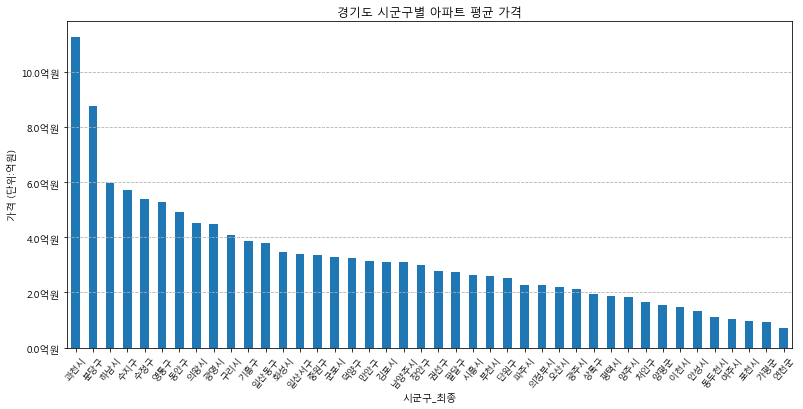

In [51]:
df = df_apt_tot[df_apt_tot['시도'] == '경기도'].groupby('시군구_최종').mean().sort_values('official_price', ascending=False).reset_index()
    
pd.set_option('display.float_format', lambda x: f'{x:,.0f}')

graph = df.plot(kind='bar', x='시군구_최종', y='official_price', width = 0.5, legend = None, figsize=(13,6))
plt.rc('font', family="Malgun Gothic") 
plt.title('경기도 시군구별 아파트 평균 가격')
plt.ylabel('가격 (단위:억원)')
graph.xaxis.set_tick_params(rotation=50, labelsize=9)
graph.grid(True, axis='y', linestyle='--')
def millions(x, pos):
    'The two args are the value and tick position'
    return '{:.1f}억원'.format(x*1e-8)
graph.yaxis.set_major_formatter(ticker.FuncFormatter(millions))
plt.savefig('경기도 시군구별', format='jpeg', dpi=300)

<ipython-input-50-1f3cf8161c13>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == '경상남도'].groupby('시군구_최종').mean().sort_values('official_price', ascending=False).reset_index()


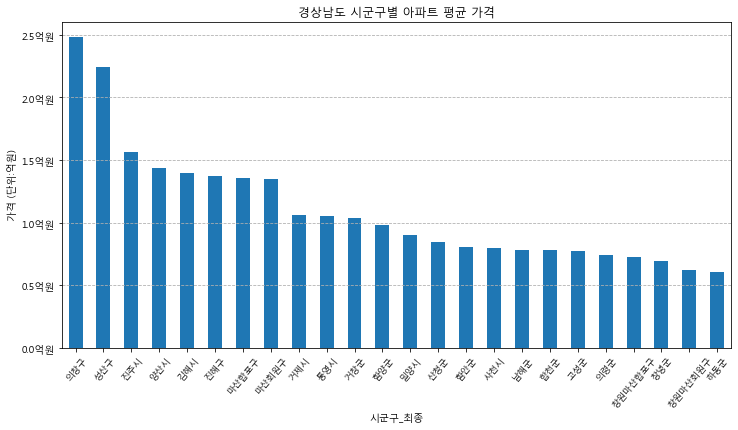

In [50]:
df = df_apt_tot[df_apt_tot['시도'] == '경상남도'].groupby('시군구_최종').mean().sort_values('official_price', ascending=False).reset_index()
    
pd.set_option('display.float_format', lambda x: f'{x:,.0f}')

graph = df.plot(kind='bar', x='시군구_최종', y='official_price', width = 0.5, legend = None, figsize=(12,6))
plt.rc('font', family="Malgun Gothic") 
plt.title('경상남도 시군구별 아파트 평균 가격')
plt.ylabel('가격 (단위:억원)')
graph.xaxis.set_tick_params(rotation=50, labelsize=9)
graph.grid(True, axis='y', linestyle='--')
def millions(x, pos):
    'The two args are the value and tick position'
    return '{:.1f}억원'.format(x*1e-8)
graph.yaxis.set_major_formatter(ticker.FuncFormatter(millions))
plt.savefig('경상남도 시군구별', format='jpeg', dpi=300)
    

<ipython-input-45-391ebdbe48c4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == '경상북도'].groupby('시군구_최종').mean().sort_values('official_price', ascending=False).reset_index()


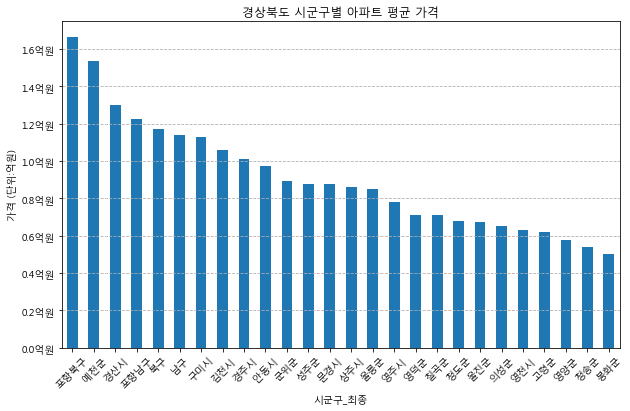

In [45]:
df = df_apt_tot[df_apt_tot['시도'] == '경상북도'].groupby('시군구_최종').mean().sort_values('official_price', ascending=False).reset_index()
    
pd.set_option('display.float_format', lambda x: f'{x:,.0f}')

graph = df.plot(kind='bar', x='시군구_최종', y='official_price', width = 0.5, legend = None, figsize=(10,6))
plt.rc('font', family="Malgun Gothic") 
plt.title('경상북도 시군구별 아파트 평균 가격')
plt.ylabel('가격 (단위:억원)')
graph.xaxis.set_tick_params(rotation=45, labelsize=10)
graph.grid(True, axis='y', linestyle='--')
def millions(x, pos):
    'The two args are the value and tick position'
    return '{:.1f}억원'.format(x*1e-8)
graph.yaxis.set_major_formatter(ticker.FuncFormatter(millions))
plt.savefig('경상북도 시군구별', format='jpeg', dpi=300)

<ipython-input-46-1364a0e17f9b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == '전라북도'].groupby('시군구_최종').mean().sort_values('official_price', ascending=False).reset_index()


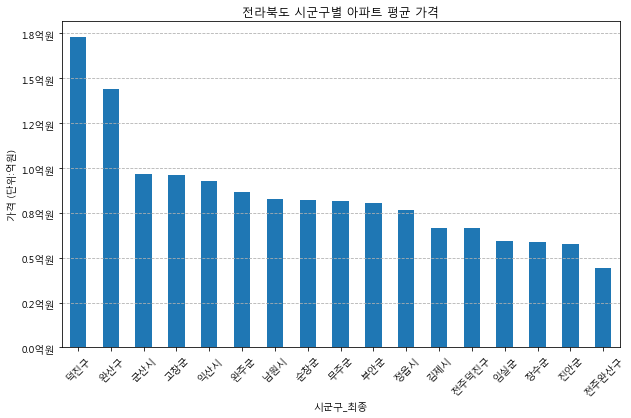

In [46]:
df = df_apt_tot[df_apt_tot['시도'] == '전라북도'].groupby('시군구_최종').mean().sort_values('official_price', ascending=False).reset_index()
    
pd.set_option('display.float_format', lambda x: f'{x:,.0f}')

graph = df.plot(kind='bar', x='시군구_최종', y='official_price', width = 0.5, legend = None, figsize=(10,6))
plt.rc('font', family="Malgun Gothic") 
plt.title('전라북도 시군구별 아파트 평균 가격')
plt.ylabel('가격 (단위:억원)')
graph.xaxis.set_tick_params(rotation=45, labelsize=10)
graph.grid(True, axis='y', linestyle='--')
def millions(x, pos):
    'The two args are the value and tick position'
    return '{:.1f}억원'.format(x*1e-8)
graph.yaxis.set_major_formatter(ticker.FuncFormatter(millions))
plt.savefig('전라북도 시군구별', format='jpeg', dpi=300)

<ipython-input-47-960823b38d3c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == '충청북도'].groupby('시군구_최종').mean().sort_values('official_price', ascending=False).reset_index()


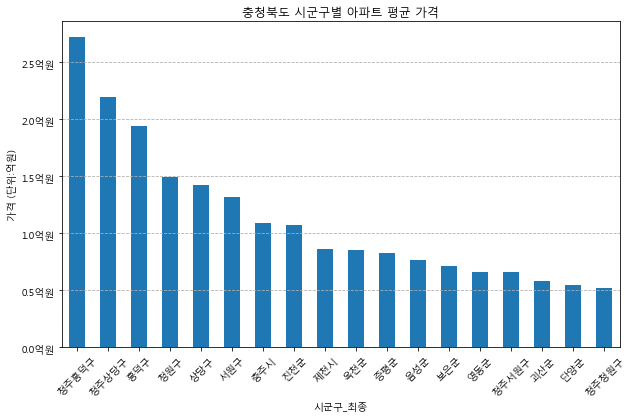

In [47]:
df = df_apt_tot[df_apt_tot['시도'] == '충청북도'].groupby('시군구_최종').mean().sort_values('official_price', ascending=False).reset_index()
    
pd.set_option('display.float_format', lambda x: f'{x:,.0f}')

graph = df.plot(kind='bar', x='시군구_최종', y='official_price', width = 0.5, legend = None, figsize=(10,6))
plt.rc('font', family="Malgun Gothic") 
plt.title('충청북도 시군구별 아파트 평균 가격')
plt.ylabel('가격 (단위:억원)')
graph.xaxis.set_tick_params(rotation=45, labelsize=10)
graph.grid(True, axis='y', linestyle='--')
def millions(x, pos):
    'The two args are the value and tick position'
    return '{:.1f}억원'.format(x*1e-8)
graph.yaxis.set_major_formatter(ticker.FuncFormatter(millions))
plt.savefig('충청북도 시군구별', format='jpeg', dpi=300)

<ipython-input-10-a9eaebb7c39e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == sido_list[k]].groupby('시군구').mean().sort_values('official_price', ascending=False).reset_index()
<ipython-input-10-a9eaebb7c39e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == sido_list[k]].groupby('시군구').mean().sort_values('official_price', ascending=False).reset_index()
<ipython-input-10-a9eaebb7c39e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Eithe

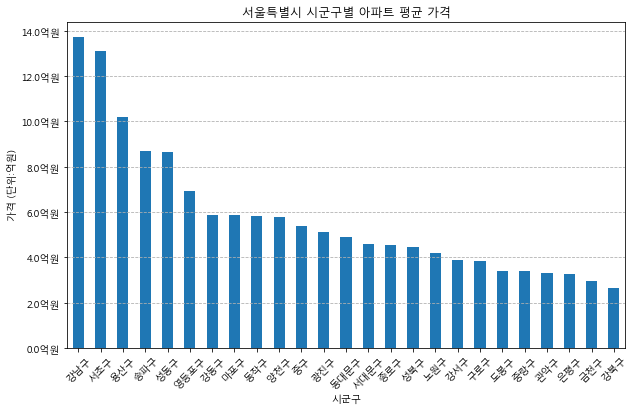

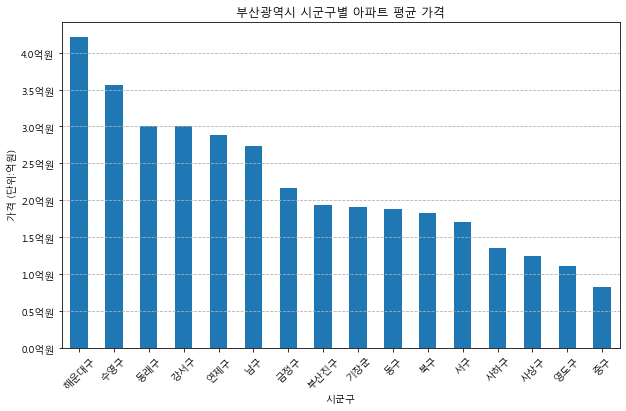

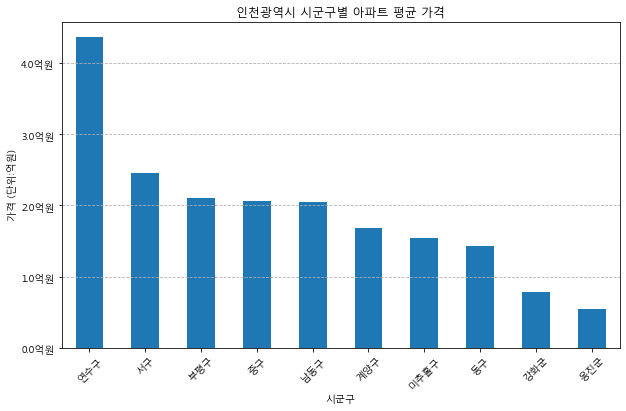

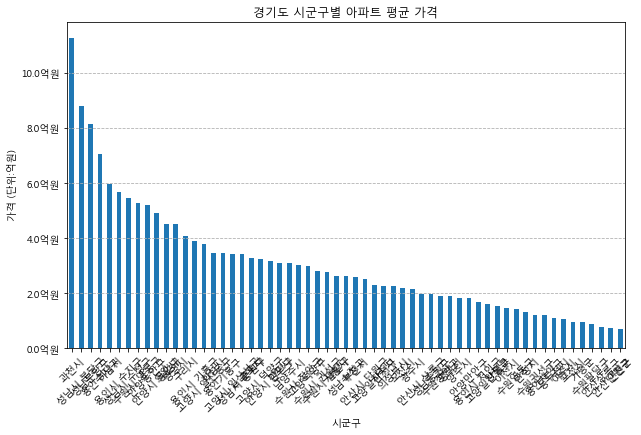

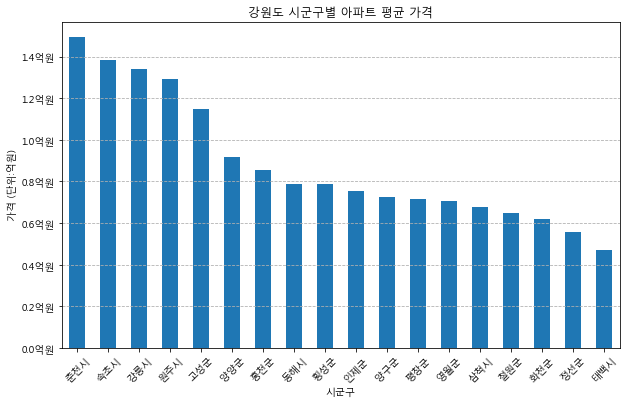

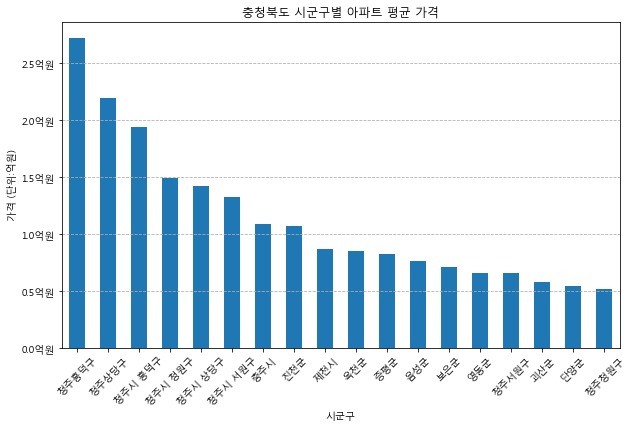

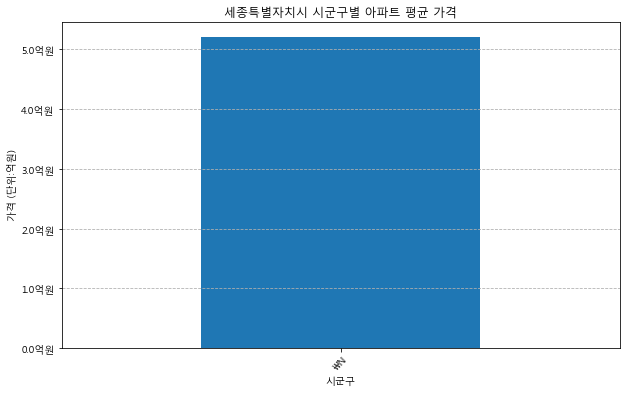

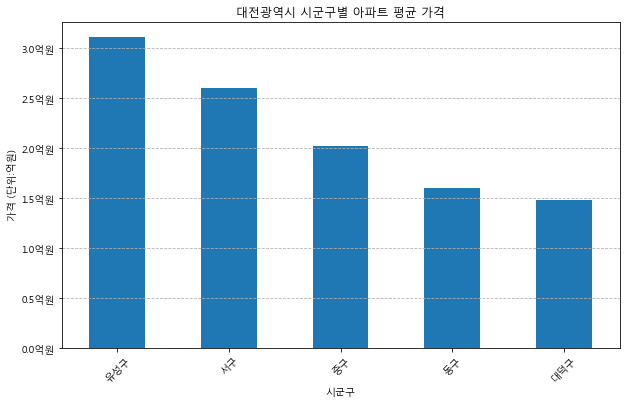

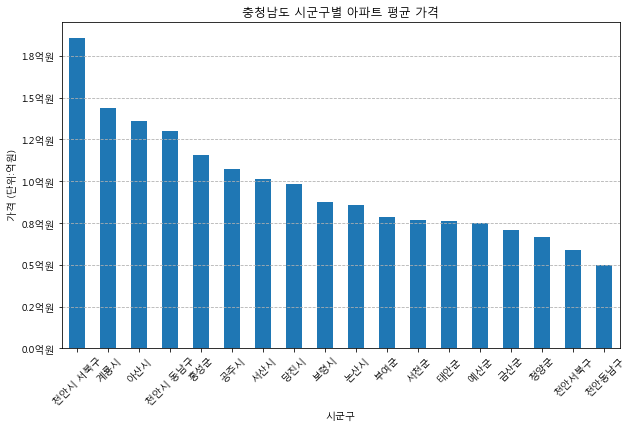

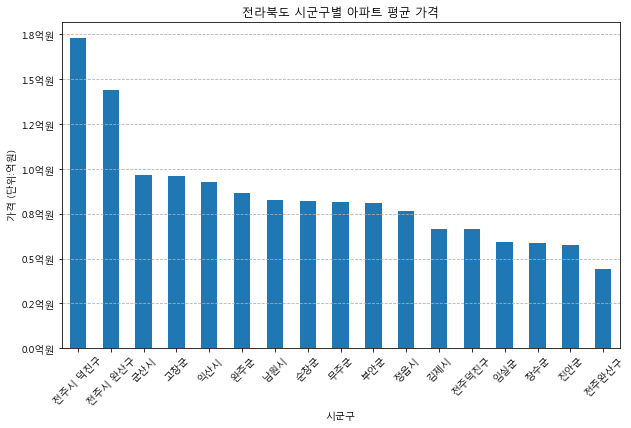

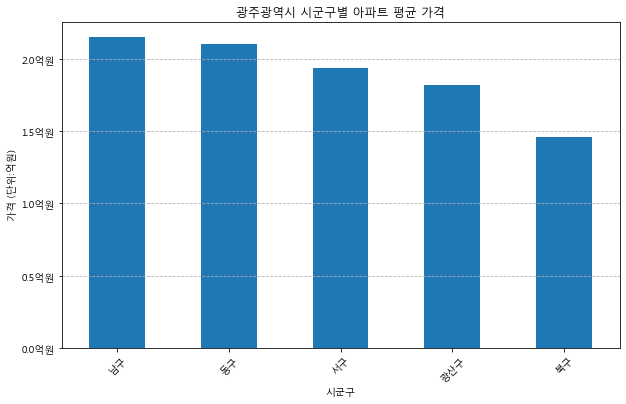

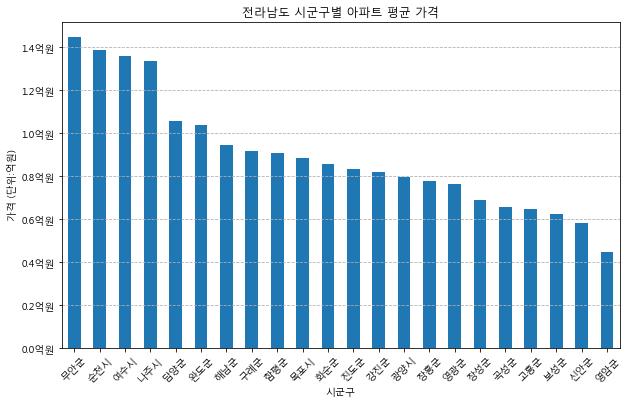

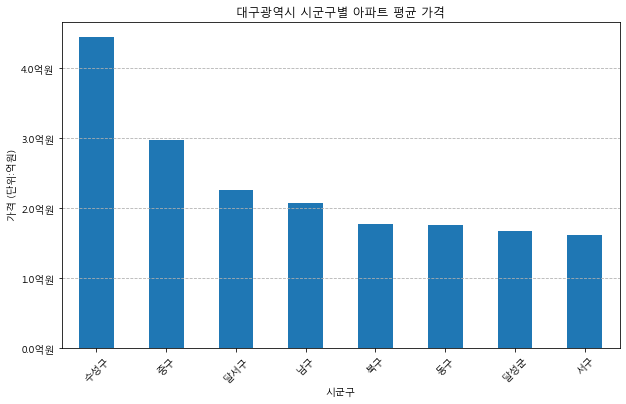

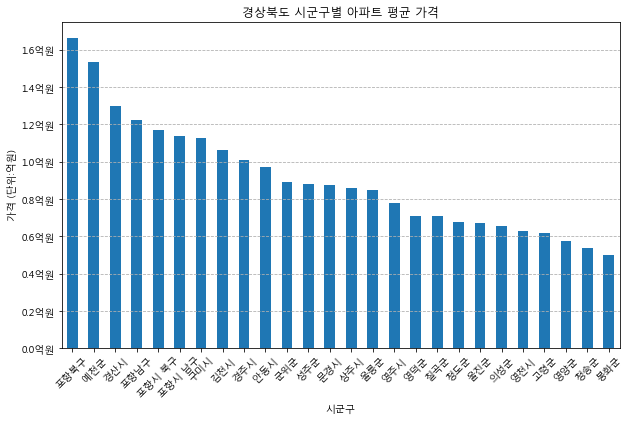

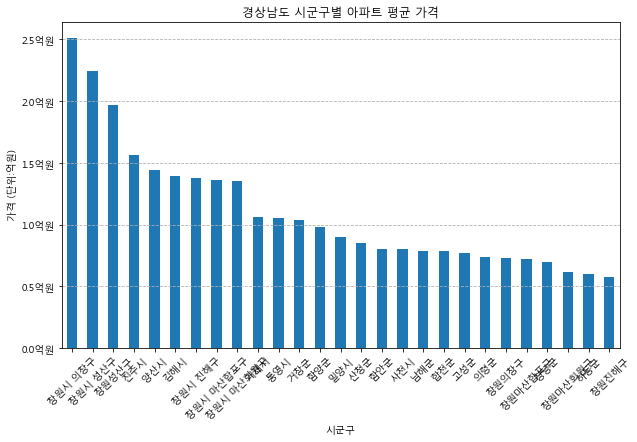

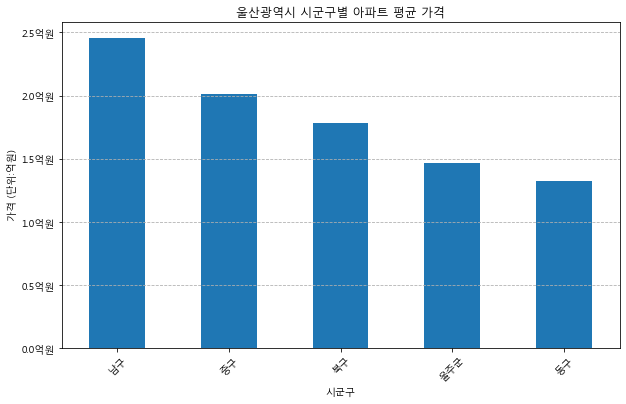

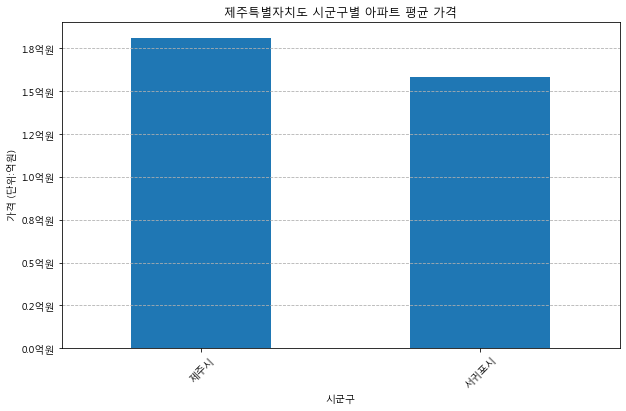

In [10]:
k=0
while k<len(sido_list):
    df = df_apt_tot[df_apt_tot['시도'] == sido_list[k]].groupby('시군구').mean().sort_values('official_price', ascending=False).reset_index()
    
    pd.set_option('display.float_format', lambda x: f'{x:,.0f}')

    graph = df.plot(kind='bar', x='시군구', y='official_price', width = 0.5, legend = None, figsize=(10,6))
    plt.rc('font', family="Malgun Gothic") 
    plt.title(sido_list[k]+' 시군구별 아파트 평균 가격')
    plt.ylabel('가격 (단위:억원)')
    graph.xaxis.set_tick_params(rotation=45, labelsize=10)
    graph.grid(True, axis='y', linestyle='--')
    def millions(x, pos):
        'The two args are the value and tick position'
        return '{:.1f}억원'.format(x*1e-8)
    graph.yaxis.set_major_formatter(ticker.FuncFormatter(millions))
    plt.savefig(sido_list[k]+'시군구별', format='jpeg', dpi=300)
    
    k=k+1

<ipython-input-48-40280733bcc7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == '충청남도'].groupby('시군구_최종').mean().sort_values('official_price', ascending=False).reset_index()


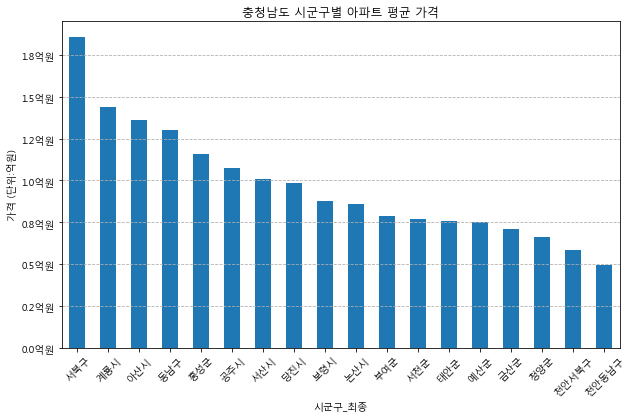

In [48]:
df = df_apt_tot[df_apt_tot['시도'] == '충청남도'].groupby('시군구_최종').mean().sort_values('official_price', ascending=False).reset_index()
    
pd.set_option('display.float_format', lambda x: f'{x:,.0f}')

graph = df.plot(kind='bar', x='시군구_최종', y='official_price', width = 0.5, legend = None, figsize=(10,6))
plt.rc('font', family="Malgun Gothic") 
plt.title('충청남도 시군구별 아파트 평균 가격')
plt.ylabel('가격 (단위:억원)')
graph.xaxis.set_tick_params(rotation=45, labelsize=10)
graph.grid(True, axis='y', linestyle='--')
def millions(x, pos):
    'The two args are the value and tick position'
    return '{:.1f}억원'.format(x*1e-8)
graph.yaxis.set_major_formatter(ticker.FuncFormatter(millions))
plt.savefig('충청남도 시군구별', format='jpeg', dpi=300)